In [1]:
# install libraries
%pip install pandas numpy matplotlib seaborn tensorflow

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import tensorflow as tf

In [3]:
# load data
master_df = pd.read_csv('./data/curation/mexico_guatemala_wosis_merged.csv')
master_df.head()

,date,longitude,latitude,upper_depth,lower_depth,country_name,region,continent,bdfi33,bdfiod,...,phprtn,sand,silt,tceq,totc,wg0010,wg0033,wg0200,wg1500,wv0033
0,1918-??-??,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1918-??-??,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1918-??-??,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1918-??-??,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1918-??-??,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f'Master: {len(master_df)}')

mexico_df = master_df[master_df['country_name'] == 'Mexico']
print(f'Mexico: {len(mexico_df)}')

guatemala_df = master_df[master_df['country_name'] == 'Guatemala']
print(f'Guatemala: {len(guatemala_df)}')

Master: 67119947
Mexico: 8208
Guatemala: 67111739


In [5]:
# remove duplicates
master_df = master_df.drop_duplicates()

mexico_df = master_df[master_df['country_name'] == 'Mexico']
print(f'Mexico after duplicates: {len(mexico_df)}')

guatemala_df = master_df[master_df['country_name'] == 'Guatemala']
print(f'Guatemala after duplicates: {len(guatemala_df)}')

Mexico after duplicates: 8173
Guatemala after duplicates: 1572986


In [6]:
print(f'Master after duplicates: {len(master_df)}')

Master after duplicates: 1581159


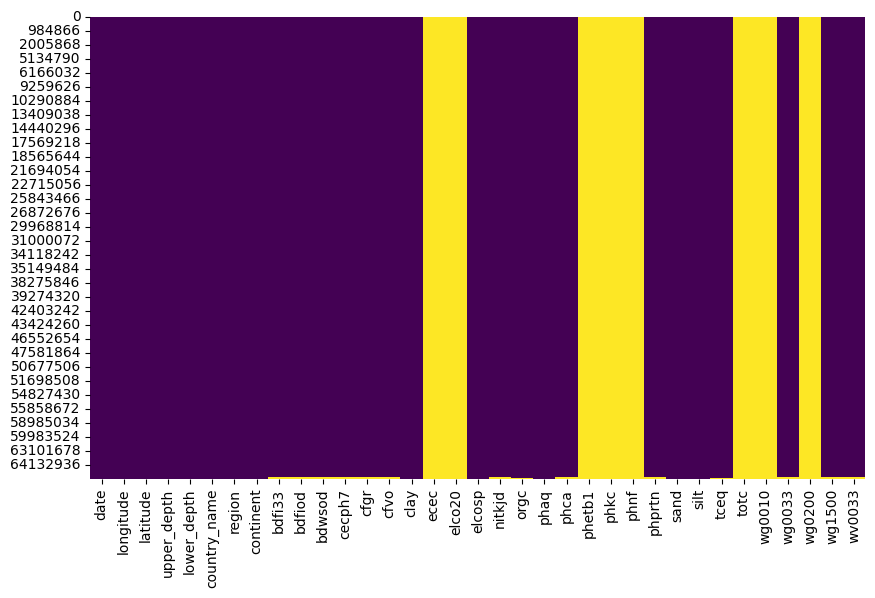

In [7]:
# missing values
plt.figure(figsize=(10, 6))
sns.heatmap(master_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
# drop columns with more than 60% missing values
master_df = master_df.dropna(thresh=0.6 * len(master_df), axis=1)

# fill missing values with the mean of the column
# master_df = master_df.fillna(master_df.mean())

In [9]:
# unique countries
print(master_df['country_name'].unique())

['Guatemala' 'Mexico']
